<a href="https://colab.research.google.com/github/den0400/Iris_Machine_Learning/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Librerias varias
import pandas as pd
from pandas import set_option
from pandas import read_csv
import csv
import numpy as np
from numpy import loadtxt
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline
#Model classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from pandas.plotting import scatter_matrix
from sklearn import svm, datasets
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
#Xboost
import xgboost
from xgboost import XGBClassifier
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
# Compare Algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# Cross Validation Classification Accuracy
from sklearn.linear_model import LogisticRegression
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
# Cross Validation Classification Confusion Matrix
from sklearn.metrics import confusion_matrix
# Cross Validation Classification Report
from sklearn.metrics import classification_report
# Extra Trees Classification
from sklearn.ensemble import ExtraTreesClassifier
# Voting Ensemble for Classification
from sklearn.ensemble import VotingClassifier




plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#describing about the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.shape

(150, 6)

In [ ]:
df.drop('Id',axis=1,inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#count the value
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
#finding the null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

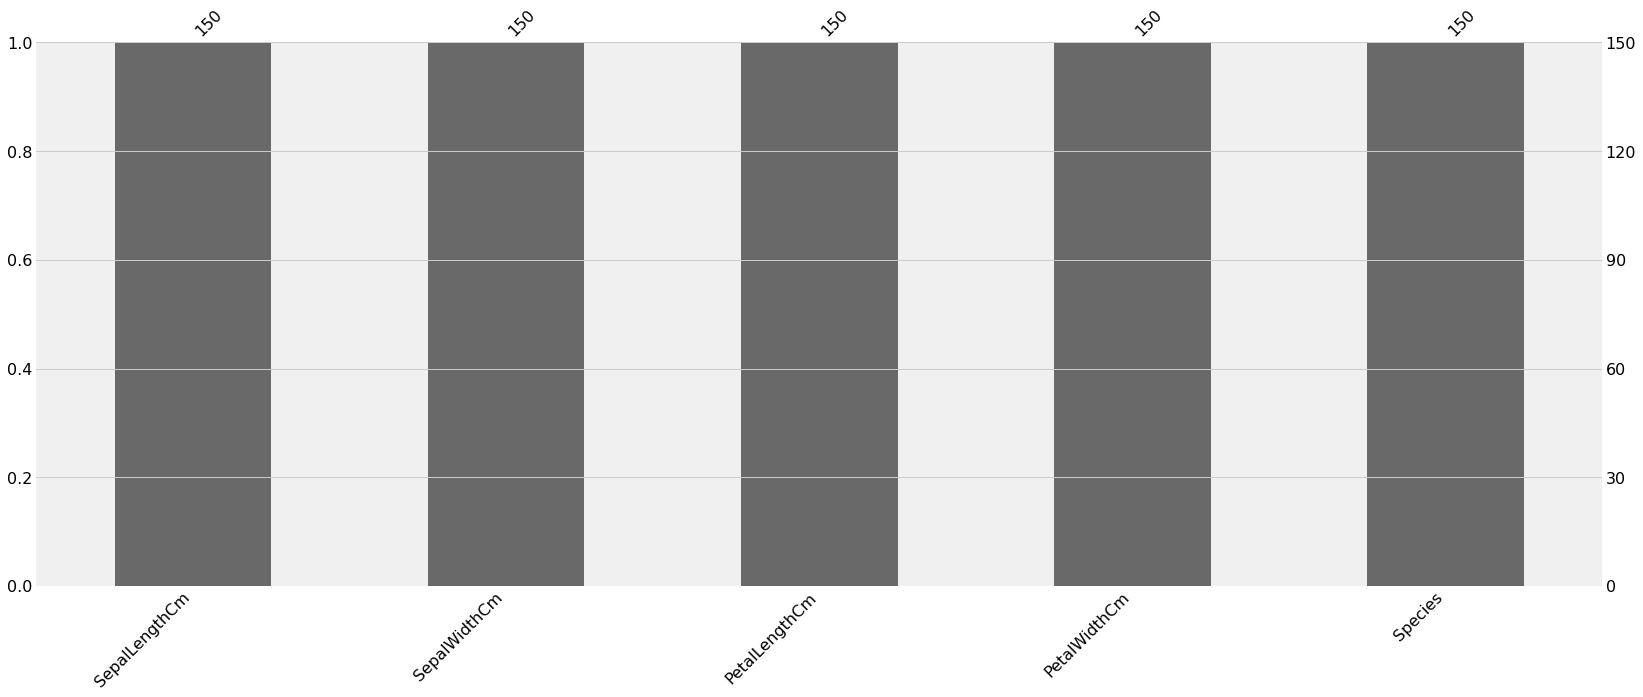

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
X=df.drop('Species',axis=1)
y=df['Species']

In [ ]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.Species)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [ ]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test, y_test))

Epoch 1/100
4/4 [==============================] - 0s 47ms/step - loss: 1.3206 - accuracy: 0.3235 - val_loss: 1.2095 - val_accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 1.1612 - accuracy: 0.3333 - val_loss: 1.1148 - val_accuracy: 0.1778
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 1.0931 - accuracy: 0.2941 - val_loss: 1.0660 - val_accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0440 - accuracy: 0.3235 - val_loss: 1.0058 - val_accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.9816 - accuracy: 0.3333 - val_loss: 0.9474 - val_accuracy: 0.3111
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.9306 - accuracy: 0.5000 - val_loss: 0.9053 - val_accuracy: 0.6000
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.8887 - accuracy: 0.6373 - val_loss: 0.8632 - val_accuracy: 0.6222
Epoch 8/100
4/4 [========

In [ ]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.2447 - accuracy: 0.9778


[0.24470901489257812, 0.9777777791023254]

In [ ]:
pred = model.predict(X_test[:10])
print(pred)

[[3.6630247e-04 2.6287559e-01 7.3675805e-01]
 [2.4637158e-04 2.3618050e-01 7.6357311e-01]
 [2.4546279e-02 8.2459319e-01 1.5086056e-01]
 [1.0836448e-02 7.2368866e-01 2.6547495e-01]
 [9.7967404e-01 2.0173950e-02 1.5199643e-04]
 [1.0207875e-02 7.9906118e-01 1.9073100e-01]
 [2.1948427e-04 1.3714811e-01 8.6263245e-01]
 [2.9175801e-04 1.6692971e-01 8.3277851e-01]
 [9.7879606e-01 2.1076405e-02 1.2750149e-04]
 [1.5254529e-03 4.4416180e-01 5.5431277e-01]]


In [ ]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
history.history['accuracy']

[0.3235294222831726,
 0.3333333432674408,
 0.29411765933036804,
 0.3235294222831726,
 0.3333333432674408,
 0.5,
 0.6372548937797546,
 0.6960784196853638,
 0.6960784196853638,
 0.686274528503418,
 0.7647058963775635,
 0.8039215803146362,
 0.7941176295280457,
 0.8039215803146362,
 0.8235294222831726,
 0.813725471496582,
 0.8235294222831726,
 0.7058823704719543,
 0.6666666865348816,
 0.6666666865348816,
 0.813725471496582,
 0.8921568393707275,
 0.8921568393707275,
 0.8725489974021912,
 0.8235294222831726,
 0.843137264251709,
 0.9019607901573181,
 0.9019607901573181,
 0.9313725233078003,
 0.9215686321258545,
 0.8333333134651184,
 0.8529411554336548,
 0.9313725233078003,
 0.9411764740943909,
 0.9117646813392639,
 0.9607843160629272,
 0.9509803652763367,
 0.9411764740943909,
 0.9411764740943909,
 0.9411764740943909,
 0.9411764740943909,
 0.9509803652763367,
 0.9411764740943909,
 0.8627451062202454,
 0.9019607901573181,
 0.9607843160629272,
 0.9019607901573181,
 0.9215686321258545,
 0.9607843

In [ ]:
history.history['val_accuracy']

[0.3333333432674408,
 0.17777778208255768,
 0.3333333432674408,
 0.3333333432674408,
 0.31111112236976624,
 0.6000000238418579,
 0.6222222447395325,
 0.6888889074325562,
 0.6888889074325562,
 0.6888889074325562,
 0.7333333492279053,
 0.7555555701255798,
 0.7555555701255798,
 0.800000011920929,
 0.7777777910232544,
 0.800000011920929,
 0.7333333492279053,
 0.6666666865348816,
 0.6666666865348816,
 0.7555555701255798,
 0.8666666746139526,
 0.8444444537162781,
 0.8888888955116272,
 0.800000011920929,
 0.800000011920929,
 0.8666666746139526,
 0.9111111164093018,
 0.8666666746139526,
 0.9111111164093018,
 0.8444444537162781,
 0.800000011920929,
 0.8888888955116272,
 0.9333333373069763,
 0.9111111164093018,
 0.9333333373069763,
 0.9333333373069763,
 0.9555555582046509,
 0.9555555582046509,
 0.9555555582046509,
 0.9555555582046509,
 0.9555555582046509,
 0.9777777791023254,
 0.8444444537162781,
 0.8222222328186035,
 0.9555555582046509,
 0.8888888955116272,
 0.8222222328186035,
 0.9333333373069

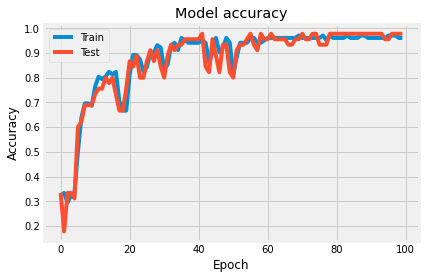

In [ ]:
plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
array = df.values
X = array[:,1:]
Y = array[:,0]

# prepare models
models = []
models.append(('Xboost', XGBClassifier(max_depth = 1, eval_metric = "mlogloss")))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Bayes', GaussianNB()))
models.append(('GradientBoosting', GradientBoostingClassifier(random_state=0)))
models.append(('Tree', DecisionTreeClassifier(random_state=0)))
models.append(('KNN2', KNeighborsClassifier(n_neighbors=2)))
models.append(('KNN3', KNeighborsClassifier(n_neighbors=3)))
models.append(('KNN4', KNeighborsClassifier(n_neighbors=5)))
models.append(('KNN10', KNeighborsClassifier(n_neighbors=10)))
models.append(('KNN20', KNeighborsClassifier(n_neighbors=20)))
models.append(('SVCPoly', GaussianNB()))
#models.append(('SVCPoly', SVC(C=1.0, kernel='poly', degree=3, gamma=2)))
models.append(('SVCsigmoid', SVC(C=1.0, kernel='sigmoid', degree=3, gamma=2)))
models.append(('SVCrbf', SVC(C=1.0, kernel='rbf', degree=3, gamma=2)))
models.append(('MLPClassifierit300l5', MLPClassifier(random_state=1, max_iter=300,hidden_layer_sizes=(5,))))
models.append(('MLPClassifierit100l5', MLPClassifier(random_state=1, max_iter=100,hidden_layer_sizes=(5,))))
models.append(('MLPClassifierit1000l15', MLPClassifier(random_state=1, max_iter=1000,hidden_layer_sizes=(15,))))
models.append(('MLPClassifierit10l3', MLPClassifier(random_state=1, max_iter=10,hidden_layer_sizes=(3,))))

#evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s -> accuracy: (%f), Standard Deviation: (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

ValueError: ignored